# Russia Ukraine Tweets Analysis

Today marks the 265th day of the Russia Ukraine war. Many countries have showed support to Ukraine in the wake of tensions between borders. People from around the world tend to update and post on social media about the ground truths and their opinions about the entire scenario. This project aims to analyse the tweets subjecting to the ongoing war to peruse people's sentiments. 

In [2]:
# import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
import warnings 
warnings.simplefilter("ignore")

In [3]:
# import dataset
data = pd.read_csv("Russia_Ukraine.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1592685869215133697  1592647655167258624  2022-11-16 01:07:56 UTC   
1  1592685867218321408  1592685432797810688  2022-11-16 01:07:56 UTC   
2  1592685866324852736  1592664579498119169  2022-11-16 01:07:55 UTC   
3  1592685866123956226  1592573670332846081  2022-11-16 01:07:55 UTC   
4  1592685862307102720  1592685862307102720  2022-11-16 01:07:54 UTC   

         date      time  timezone              user_id        username  \
0  2022-11-16  01:07:56         0  1531930262334066688    tha_mahnflex   
1  2022-11-16  01:07:56         0  1519444848163532800  metal_viking_6   
2  2022-11-16  01:07:55         0  1500206993189089286        zurgas69   
3  2022-11-16  01:07:55         0  1337546453774950401         fizulij   
4  2022-11-16  01:07:54         0  1479250226452090887      jeffensane   

                   name place  ... geo source user_rt_id user_rt retweet_id  \
0          Apostle Paul   NaN  ... NaN    N

## EDA

In [4]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


For this analysis, we only need three columns - username, tweet and language.

In [5]:
data = data[["username", "tweet", "language"]]

In [6]:
data.isnull().sum()


username    0
tweet       0
language    0
dtype: int64

In [7]:
#Check the languages used in the Tweets 
data["language"].value_counts()


en     8748
pt      616
it      130
in       87
qme      83
es       65
tr       33
de       33
und      24
pl       19
fr       17
ca       17
nl       16
qht      14
ru       14
hi       13
ja       13
zh       11
fi        5
uk        5
bn        4
ar        4
tl        4
cs        3
sv        3
th        3
ro        3
ht        2
fa        2
ko        2
qam       2
vi        2
cy        1
ml        1
et        1
ur        1
el        1
lt        1
Name: language, dtype: int64

Most of the tweets are in English, followed by Portuguese and Italian. We need to remove all the links, punctuation, symbols and other language errors from the tweets to prepare the data for sentiment analysis.

In [8]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aakanksha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In order to get a generic overview of the sentiments, we have to take a look at the tweets' wordcloud, which displays the most commonly used words in tweets by people expressing their thoughts and updates on the Ukraine-Russia conflict

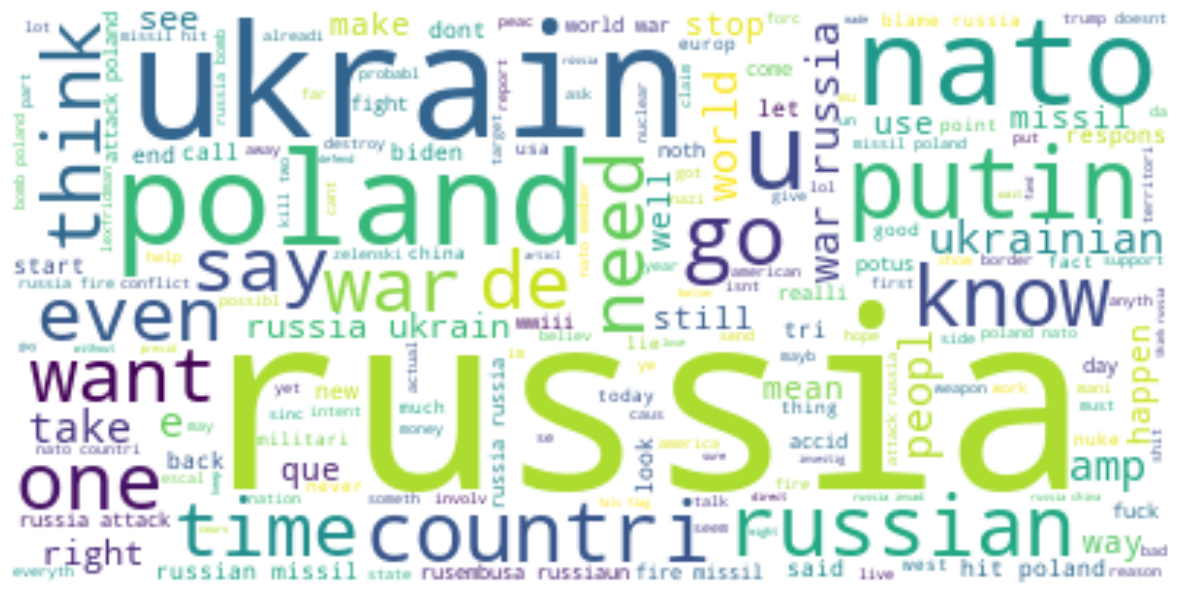

In [9]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

By computing the sentiment scores of the tweets,I've added three more columns to this dataset: Positive, Negative, and Neutral

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aakanksha/nltk_data...


                                               tweet  Positive  Negative  \
0  bustedtrussrod iamjimspe  oleksiireznikov defi...     0.065     0.000   
1  yellowflashguy need make sure truli launch rus...     0.339     0.195   
2  observadorpt para haver guerra e preciso haver...     0.000     0.000   
3   better pay attent iranian drone get russia us...     0.158     0.245   
4  nato need put boot putin ass hes lowlif scumba...     0.130     0.325   

   Neutral  
0    0.935  
1    0.466  
2    1.000  
3    0.598  
4    0.545  


Now let's check the most commonly used terms in tweets with positive sentiment score

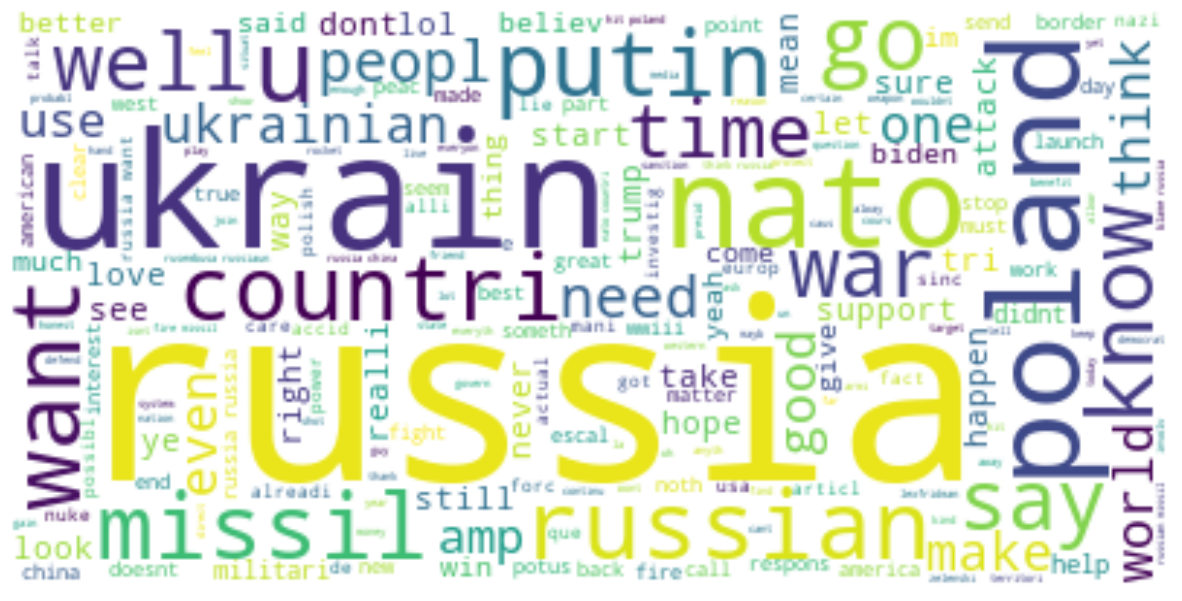

In [13]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now in case of negative scores

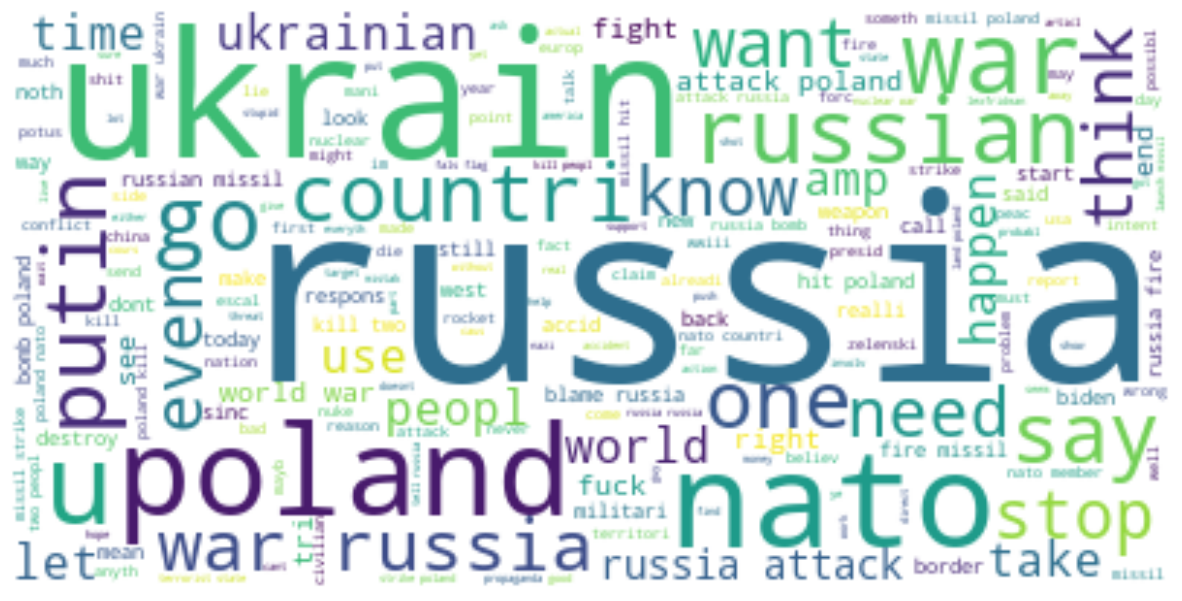

In [14]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()